In [ ]:
"""
TODO:
- resize all graphs
- proofread all paragraphs
- dive into theory and understand why the results are the way they are
- plot both algorithms next to each other with explanations as to why 
  they are different and the advantages/distadvantages of each
- clean the code (pep 8) and add comments to everything
"""

## HCAA vs. HRP Comparison [change title]

## Abstract
This tutorial notebook will demonstrate the differences between the Hierarchical Clustering Asset Allocation and the Hierarchical Risk Party algorithms, applied through the MlFinLab library. Readers will be taken through how they can construct optimal portfolios utilizing both algorithms while understanding the main differences which separate them.

## Introduction

This tutorial notebook will serve as a comparison notebook demonstrating the differences between Thomas Raffinot's __[Hierarchical Equal Risk Contribution](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3237540)__ (HERC) and Dr. Marcos Lopez de Prado's __[Hierarchical Risk Parity](https://hudsonthames.org/an-introduction-to-the-hierarchical-risk-parity-algorithm/)__ (HRP) algorithms. 

### Hierarchical Equal Risk Contribution
From Raffinot's description of the HERC algorithm, we can distill the HERC algorithm down into four steps:
1. Hierarchical clustering
2. Selecting the optimal number of clusters
3. Top-Down recursive bisection
4. Implement Naive Risk Parity within clusters to allocate weights to each asset


### Hierarchical Risk Parity
The HRP algorithm is quite similar to the HCAA algorithm as they both use a hierarchical clustering technique at the beginning. Although, the algorithms differ in the latter steps. From Dr. Lopez de Prado, we can break down the HRP algorithm into three main steps:
1. Hierarchical clustering
2. Quasi-diagonalization
3. Recursive bisection

[add closing remarks and more info if needed]

In [1]:
# importing our required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from mlfinlab.portfolio_optimization.hcaa import HierarchicalClusteringAssetAllocation
from mlfinlab.portfolio_optimization.hrp import HierarchicalRiskParity

## The Data
All stock data in this tutorial was accesssed through the yfinance library. To learn more about the yfinance library and how to install it, please refer to the official project description __[here](https://pypi.org/project/yfinance/)__. In this tutorial, we will be working with 5-year historical closing-price data from Apple, Amazon, Facebook, Google, IBM, Microsoft, Netflix, Oracle, and Tesla. Note that the data must be in a Pandas dataframe indexed by date.

In [2]:
raw_prices = yf.download("AAPL AMZN FB MSFT NFLX TSLA GOOGL ORCL IBM", start='2015-01-01', end='2020-01-01')
stock_prices = raw_prices.iloc[::-1]
stock_prices = stock_prices['Close']
stock_prices.head()

[*********************100%***********************]  9 of 9 completed


,AAPL,AMZN,FB,GOOGL,IBM,MSFT,NFLX,ORCL,TSLA
Date,,,,,,,,,
2019-12-31,293.649994,1847.839966,205.250000,1339.390015,134.039993,157.699997,323.570007,52.980000,418.329987
2019-12-30,291.519989,1846.890015,204.410004,1339.709961,132.809998,157.589996,323.309998,52.700001,414.700012
2019-12-27,289.799988,1869.800049,208.100006,1354.640015,135.270004,158.960007,329.089996,53.459999,430.380005
2019-12-26,289.910004,1868.770020,207.789993,1362.469971,134.910004,158.669998,332.630005,53.570000,430.940002
2019-12-24,284.269989,1789.209961,205.119995,1344.430054,134.979996,157.380005,333.200012,53.439999,425.250000


## HCAA Portfolio Build
The HCAA portfolio in this example will be built utilizing the HierarchicalClusteringAssetAllocation() class provided through MlFinLab. In order to implement this portfolio optimization, we will run the allocate method with three parameters:
1. asset_names (a list of strings containing the asset names)
2. asset_prices (a dataframe of historical asset prices - daily close)
3. allocation_metric (the type of solution/algorithm to use to calculate the weights)

Please keep in mind that we are only working with these three parameters for simplicity. The MlFinLab library supports many more customizable parameters which can be used as well. Users can also specify:
1. A covariance matrix and expected asset returns instead of historical prices
2. The type of linkage algorithm being used
3. The optimal number of clusters for hierarchical clustering
4. The confidence level for calculating expected shortfall and conditional drawdown at risk
5. The method to use for calculation of expected returns

If you would like to learn more about this implementation and how you can utilize these additional parameters, please refer to the __[official documentation](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/hierarchical_clustering_asset_allocation.html)__. 

In [11]:
# HCAA portfolio
hcaa = HierarchicalClusteringAssetAllocation()
hcaa.allocate(asset_names=stock_prices.columns,
              asset_prices=stock_prices,
              allocation_metric='minimum_variance')
hcaa.weights

,NFLX,AAPL,FB,AMZN,GOOGL,MSFT,TSLA,IBM,ORCL
0,0.163349,0.122996,0.123826,0.184225,0.068371,0.18815,0.060523,0.066627,0.021933


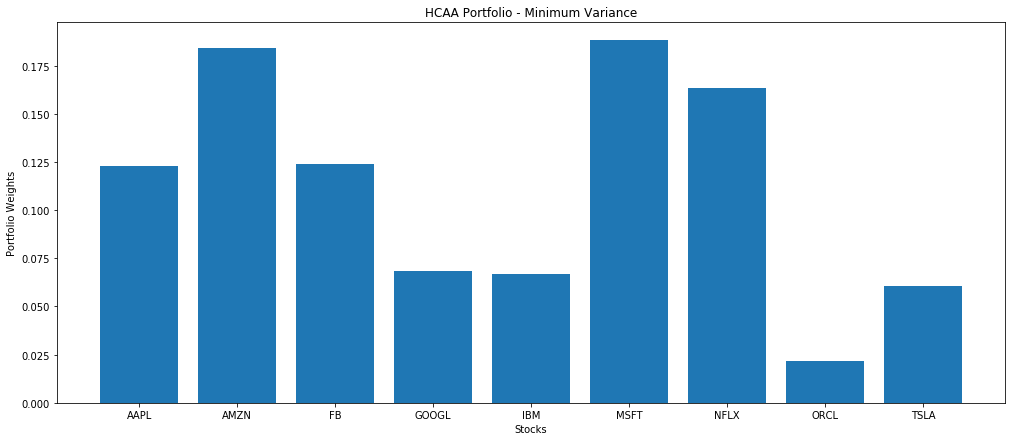

In [12]:
# plotting our HCAA portfolio
hcaa_weights = hcaa.weights[sorted(hcaa.weights)]
hcaa_weights = hcaa_weights.values.tolist()
hcaa_weights = [item for sublist in hcaa_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))

plt.figure(figsize=(17,7))
plt.bar(y_pos, hcaa_weights)
plt.xticks(y_pos, sorted(hcaa.weights))
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('HCAA Portfolio - Minimum Variance')
plt.show()

## HRP Portfolio Build
The HRP portfolio in this example will be built through the HierarchicalRiskParty() class provided through MlFinLab. Slightly different from the HCAA implementation, the HRP portfolio build will utilize the following two parameters:
1. asset_names (a list of strings containing the asset names)
2. asset_prices (a dataframe of historical asset prices - daily close)

Similarly to the HCAA implementation, users also have acces to a great degree of customizability when working with the HRP implementation. Specificaly, MlFinLab allows users to specify:
1. Whether to shrink the covariance or not
2. How to resample the prices if needed
3. The type of linkage algorithm being used for clustering

Additionally, users can provide a matrix of asset returns, a covariance matrix of asset returns, and a distance matrix instead of the raw historical prices if they like. For simplicity, we will only be working with the two necessary parameters, the asset names and the asset prices.

If you would like to learn more about the HRP implementation, please refer to the __[official documentation](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/hierarchical_risk_parity.html)__.

In [5]:
# HRP portfolio
hrp = HierarchicalRiskParity()
hrp.allocate(asset_names=stock_prices.columns,
             asset_prices=stock_prices)
hrp.weights

,TSLA,IBM,NFLX,ORCL,AAPL,FB,AMZN,GOOGL,MSFT
0,0.050421,0.234809,0.057192,0.216662,0.119478,0.090569,0.081852,0.073723,0.075294


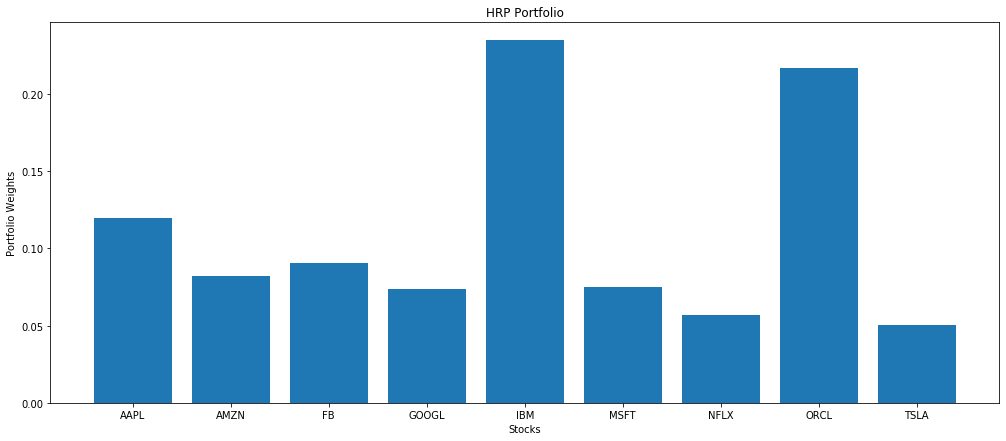

In [6]:
# plotting our HRP portfolio
hrp_weights = hrp.weights[sorted(hrp.weights)]
hrp_weights = hrp_weights.values.tolist()
hrp_weights = [item for sublist in hrp_weights for item in sublist]
y_pos = np.arange(len(stock_prices.columns))

plt.figure(figsize=(17,7))
plt.bar(y_pos, hrp_weights)
plt.xticks(y_pos, sorted(hrp.weights))
plt.xlabel('Stocks')
plt.ylabel('Portfolio Weights')
plt.title('HRP Portfolio')
plt.show()

We can also take advantage of the plot_clusters method to visualize the portfolio clusters through a dendrogram

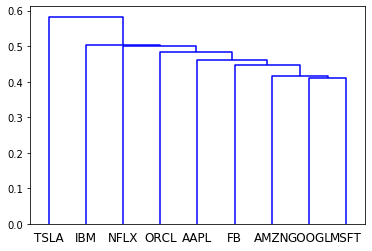

In [7]:
hrp.plot_clusters(stock_prices.columns)
plt.show()

## Comparison

[provide insights as to why the results were what they were]

[maybe provide more examples]

## Conclusion

[insert conclusion here]